# Detecting Fake News using LSTM


## Context
Fake news can have severe consequences for businesses, governments, and society as a whole. By detecting fake news, businesses can avoid making decisions based on false information and prevent potential damage to their reputation.
The primary objective is to use LSTM to detect fake news effectively. 

## Dataset Details
WELFake is a dataset of 72,134 news articles with 35,028 real and 37,106 fake news. For this, authors merged four popular news datasets (i.e. Kaggle, McIntire, Reuters, BuzzFeed Political) to prevent over-fitting of classifiers and to provide more text data for better ML training.
The dataset contains four columns: Serial number (starting from 0); Title (about the text news heading); Text (about the news content); and Label (0 = fake and 1 = real).


## Model Used 
Long Short-Term Memory (LSTM) networks, a variation on RNNs, took Sequential Deep Learning to the next level by introducing a gated mechanism to handle long-term dependencies in data in a better manner and mitigate the Vanishing Gradient problem that RNNs are prone to. LSTMs were able to significantly improve the contextual memory and prediction quality of RNNs, and were widely adopted as the NLP architecture of choice in wide-ranging business applications before the advent of Transformer models.

In [1]:
# Importing the required the libraries
import numpy as np
# To read and manipulate the data
import pandas as pd
pd.set_option('max_colwidth', None)

# To visualise the graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Helps to display the images
from PIL import Image

# Helps to visualize the wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import re, string, unicodedata  

import re
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = list(stopwords.words('english'))

# Helped to create train and test data
from sklearn.model_selection import train_test_split

# Metrics to evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Used to create the Sequential model
from keras.models import Sequential
import tensorflow
# Used to create the tokens from the text data
from tensorflow.keras.preprocessing.text import Tokenizer

# Helps to pad the sequences into the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Layers that are used to implement the LSTM model
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
# for dropout layers
from keras.layers import Dropout
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



- Read the WELFake dataset and print some initial rows

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Project2/WELFake_Dataset.csv')

In [4]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71576 non-null  object
 1   text    72095 non-null  object
 2   label   72134 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.7+ MB



- Merge title and text columns

In [6]:
df['text'] =df['title'].astype(str)+df['text']

In [7]:
#Dropping the title column after merging it with the text column
df = df.drop(['title'], axis = 1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    72095 non-null  object
 1   label   72134 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


Preprocess values of text & headline column

In [9]:
# Replace empty strings with null
df = df.mask(df == '')
#Drop null values
df = df.dropna()
#Drop duplicates
df = df.drop_duplicates(keep='first')

print('nan in data set:', df.isna().sum())
print('duplicates in data set:', df.duplicated().sum())

nan in data set: text     0
label    0
dtype: int64
duplicates in data set: 0


In [10]:
def unwanted_characters(text):
  text = re.sub(r'[^a-zA-Z0-9\s]+', '',str(text))
  return text 

def lowercase(text):
  text = text.lower()
  return text

def remove_numbers(text):
   text = re.sub(r'\d',' ',text)
   return text

def remove_mention(text):
    text = re.sub(r'@\w+','',text)
    return text

def remove_hash(text):
    text = re.sub(r'#\w+','',text)
    return text

def extraspaces(text):
  text = re.sub(r'\s+',' ',text)
  return text

def clean_text(text):
  text = unwanted_characters(text)
  text = lowercase(text)
  text = remove_numbers(text)
  text = remove_mention(text)
  text = remove_hash(text)
  text = extraspaces(text)
  return text

In [11]:
# Apply the function 
df['text'] = df.apply(lambda row: clean_text(row['text']), axis=1)

In [12]:
# Remove stop words with a separate function
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

In [13]:
#Check the data
df[['text', 'label']].head()

text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          law enforcement high alert following threats cops whites blacklivesmatter fyf terrorists videono comment expected barack obama members fyf fukyoflag blacklivesmatter movements called lynching hanging white people cops encouraged others radio show tuesday night turn tide kill white people cops send message killing black people americaone fyoflag organizers called sunshine radio blog show hosted texas called sunshine fing opinion radio show snapshot fyf lolatwhitefear twitter page pm shows urging supporters call fyf tonight continue dismantle illusion white snapshot twitter radio call invite fyf radio show aired pm eastern standard timeduring show callers clearly call lynching killing white peoplea minute clip radio show heard provided breitbart texas someone would like referred hannibal already received death threats result interrupting fyf conference callsan unidentified black man said mother fkers start fing like us bunch niers takin one us roll said cause already roll gangs anyway six seven black mother fckers see white person lynch ass let turn tables conspired cops started losing people state emergency speculated one two things would happen bigass r war niers going start backin already getting killed fk got lose sunshine could heard saying yep true fking true said need turn tables kids getting shot somebody needs become sacrifice sidehe said everybody st whatever like say everybody different position war continued give fk anyway said might well utilized st turn tables ners said way start lookin like havin many casualties causalities side instead killing black people black lives matter mother fkers 

## EDA

In [14]:
#Create a world cloud for the entire text column
all_news = ' '.join(text for text in df['text'])

In [15]:
#Creating the wordcloud using the WordCloud() method
wordcloud = WordCloud(stopwords = STOPWORDS,
                      colormap = 'Greys',
                      background_color = 'white',
                      width = 3000,
                      height = 2500
                     ).generate(all_news) 

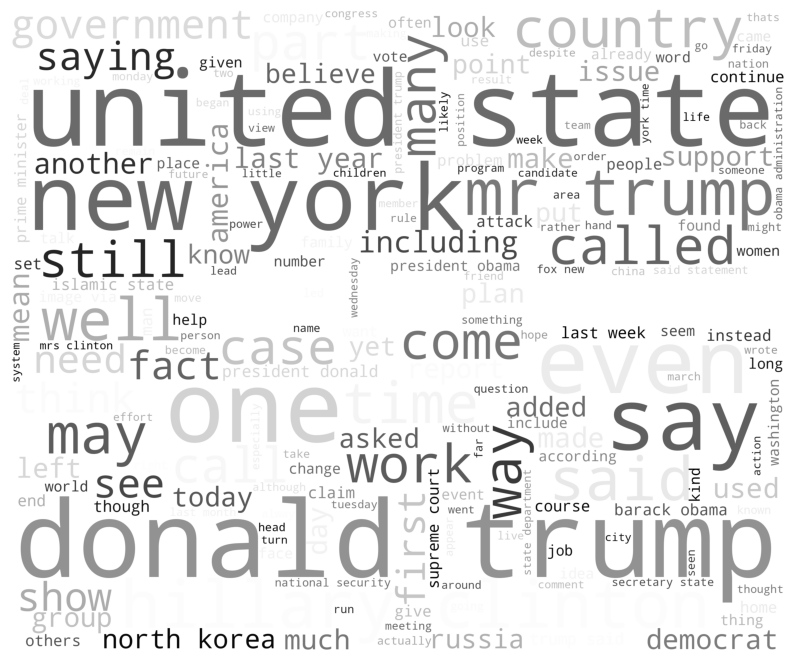

In [16]:
#Plotting the figure 
plt.figure(1, figsize = (10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [17]:
fake_news = df[df['label'] == 1]
real_news = df[df['label'] == 0]

In [18]:
#joining the negative reviews using space seperator, helps to convert the all rows into one string
words = ' '.join(fake_news['text']) 

# helps to remove the \n characters from the previous output
cleaned_fake = " ".join([word for word in words.split()]) 

In [19]:
# creating the wordcloud using the WordCloud() method
wordcloud = WordCloud(stopwords = STOPWORDS,
                      colormap = 'Reds',
                      background_color = 'white',
                      width = 3000,
                      height = 2500
                     ).generate(cleaned_fake) 

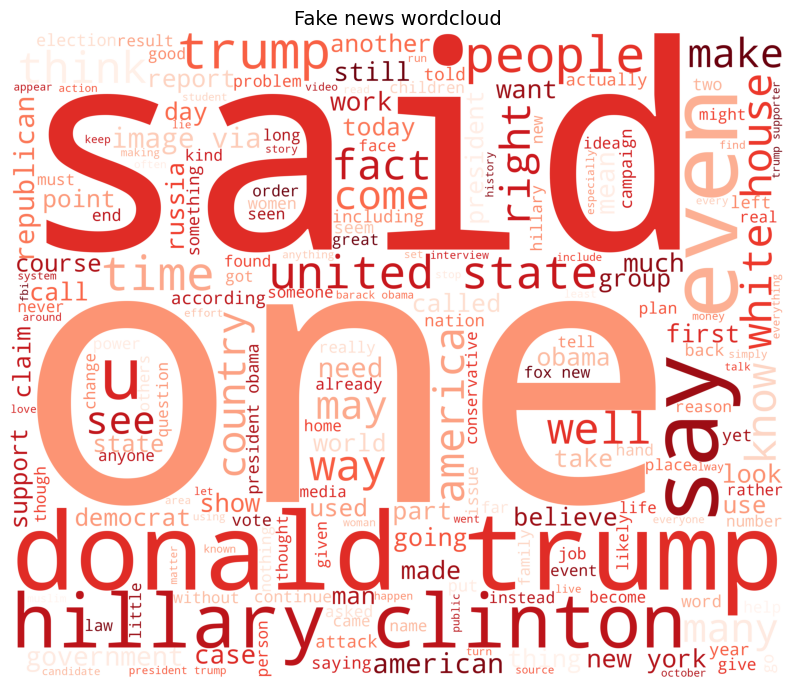

In [20]:
plt.figure(1, figsize = (10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Fake news wordcloud', fontsize = 14)
plt.show()

In [21]:
#joining the negative reviews using space seperator, helps to convert the all rows into one string
words = ' '.join(real_news['text']) 

# helps to remove the \n characters from the previous output
cleaned_real = " ".join([word for word in words.split()]) 

In [22]:
# creating the wordcloud using the WordCloud() method
wordcloud = WordCloud(stopwords = STOPWORDS,
                      colormap = 'Greens',
                      background_color = 'white',
                      width = 3000,
                      height = 2500
                     ).generate(cleaned_real) 

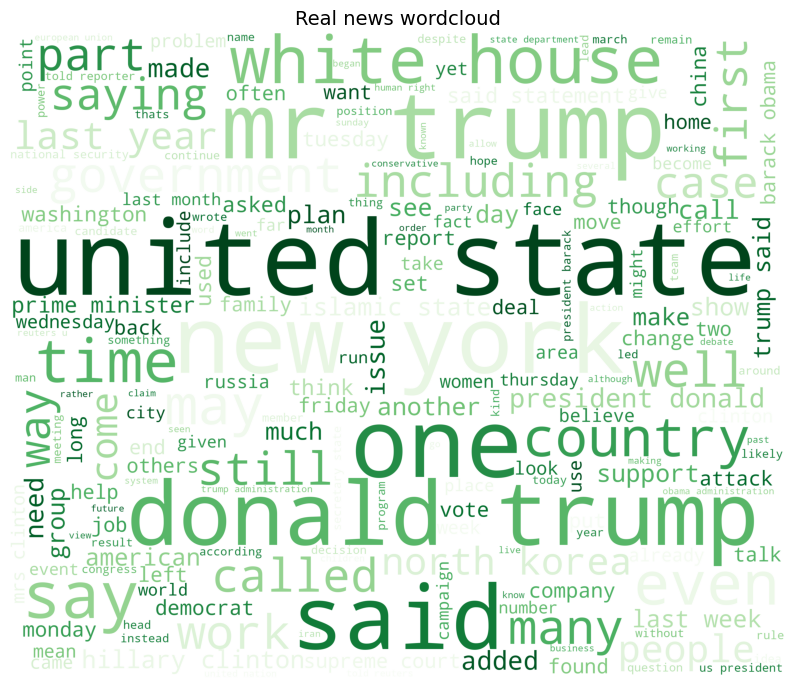

In [23]:
plt.figure(1, figsize = (10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Real news wordcloud', fontsize = 14)
plt.show()

In [24]:
#Plot the distribution of Fake & Real News

def bar_plot(df, feature):
    # Creating the countplot
    plot = sns.countplot(x = df['label'], palette='Greys')
    
    # Finding the length the whole df
    total = len(df)
    
    # Creating the percentages to each label in the df
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y),ha="center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points")
    plt.show()

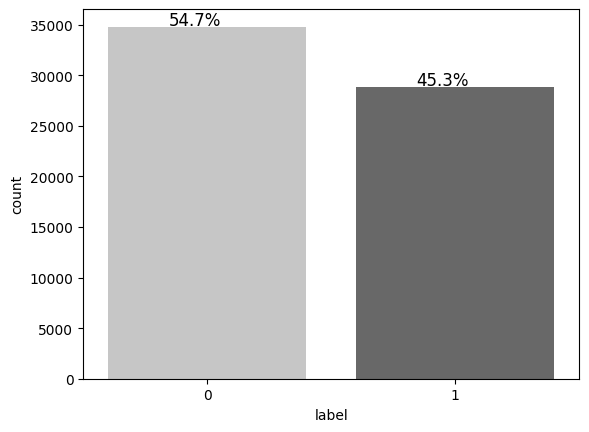

In [25]:
bar_plot(df, 'label')

In [26]:
df['num_words'] = df['text'].apply(lambda x: len(x.split()))

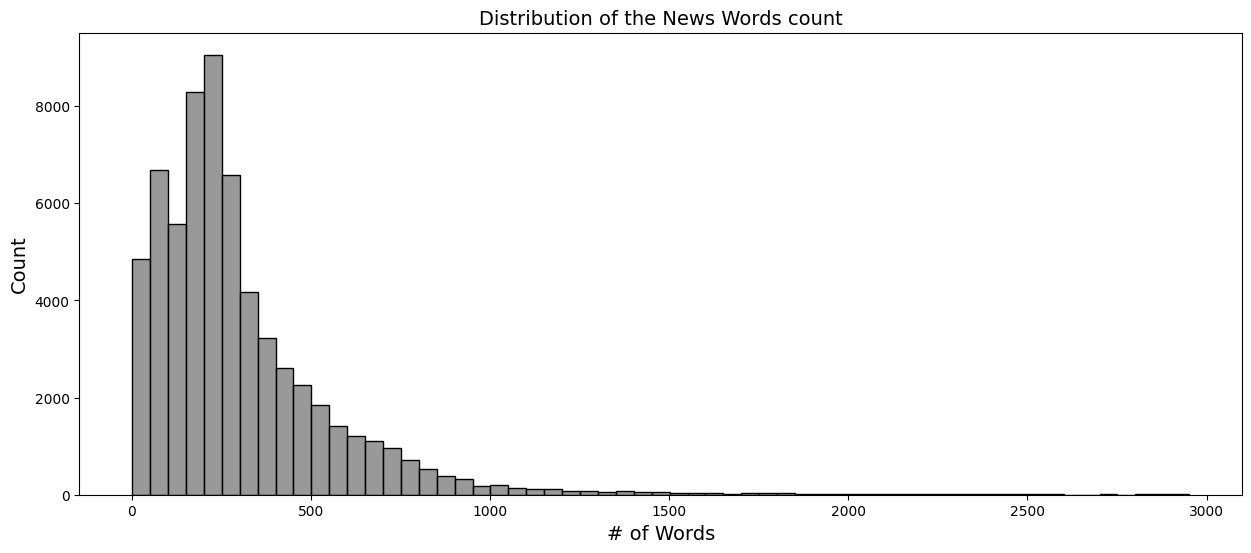

In [27]:
#get the distribution of words for each class
fig = plt.figure(figsize = (15, 6))
sns.histplot(df['num_words'], color='Grey', bins=range(1,3000,50), alpha=0.8)
plt.xlabel('# of Words', size = 14)
plt.ylabel('Count', size = 14)
plt.title('Distribution of the News Words count', fontsize = 14)
plt.show()

- Split the dataset into training and testing

In [28]:
X = df['text']
y = pd.get_dummies(df['label'])

In [29]:
# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [30]:
# define Keras Tokenizer
tok = Tokenizer(num_words = 700, split = ' ')

tok.fit_on_texts(df['text'].values)

# return sequences
sequences = tok.texts_to_sequences(X_train.values)
test_sequences = tok.texts_to_sequences(X_test.values)

In [31]:
print(len(tok.word_index))

370522


-Pad sequences to fixed length

In [32]:
# maximum sequence length (512 to prevent memory issues and speed up computation)
MAX_LEN = 512

# padded sequences
X_train_seq = pad_sequences(sequences, maxlen=MAX_LEN)
X_test_seq = pad_sequences(test_sequences, maxlen=MAX_LEN)

In [33]:
X_train_seq.shape[1]

512

-Build model 

In [34]:
embedding_vector_features=40

model= Sequential()

model.add(Embedding(len(tok.word_index), embedding_vector_features, input_length= X_train_seq.shape[1]))
                    
model.add(SpatialDropout1D(0.2))
model.add(LSTM(150, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 512, 40)           14820880  
                                                                 
 spatial_dropout1d (SpatialD  (None, 512, 40)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 150)               114600    
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense (Dense)               (None, 2)                 302       
                                                                 
Total params: 14,935,782
Trainable params: 14,935,782
Non-trainable params: 0
____________________________________________

In [35]:
# compile the model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

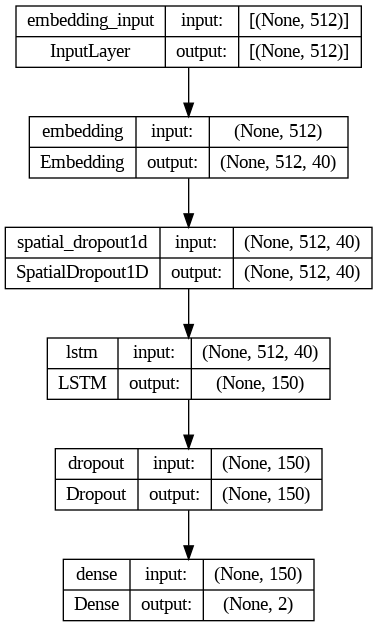

In [36]:
 # plotting the model architecture
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

-Training the model 

In [37]:
#specifying the batch size
batch_size = 32

history = model.fit(X_train_seq, y_train, validation_split = 0.2, epochs=10, batch_size=batch_size, verbose = 'auto')

Epoch 1/10
1114/1114 [==============================] - 1835s 2s/step - loss: 0.2789 - accuracy: 0.8882 - val_loss: 0.2157 - val_accuracy: 0.9158
Epoch 2/10
1114/1114 [==============================] - 1817s 2s/step - loss: 0.2179 - accuracy: 0.9154 - val_loss: 0.1984 - val_accuracy: 0.9237
Epoch 3/10
1114/1114 [==============================] - 1812s 2s/step - loss: 0.2022 - accuracy: 0.9227 - val_loss: 0.2047 - val_accuracy: 0.9258
Epoch 4/10
1114/1114 [==============================] - 1824s 2s/step - loss: 0.2208 - accuracy: 0.9130 - val_loss: 0.1791 - val_accuracy: 0.9332
Epoch 5/10
1114/1114 [==============================] - 1824s 2s/step - loss: 0.1914 - accuracy: 0.9266 - val_loss: 0.1769 - val_accuracy: 0.9329
Epoch 6/10
1114/1114 [==============================] - 1819s 2s/step - loss: 0.1849 - accuracy: 0.9269 - val_loss: 0.1626 - val_accuracy: 0.9383
Epoch 7/10
1114/1114 [==============================] - 1816s 2s/step - loss: 0.1511 - accuracy: 0.9429 - val_loss: 0.2400 -

(0.0, 0.2859309270977974)

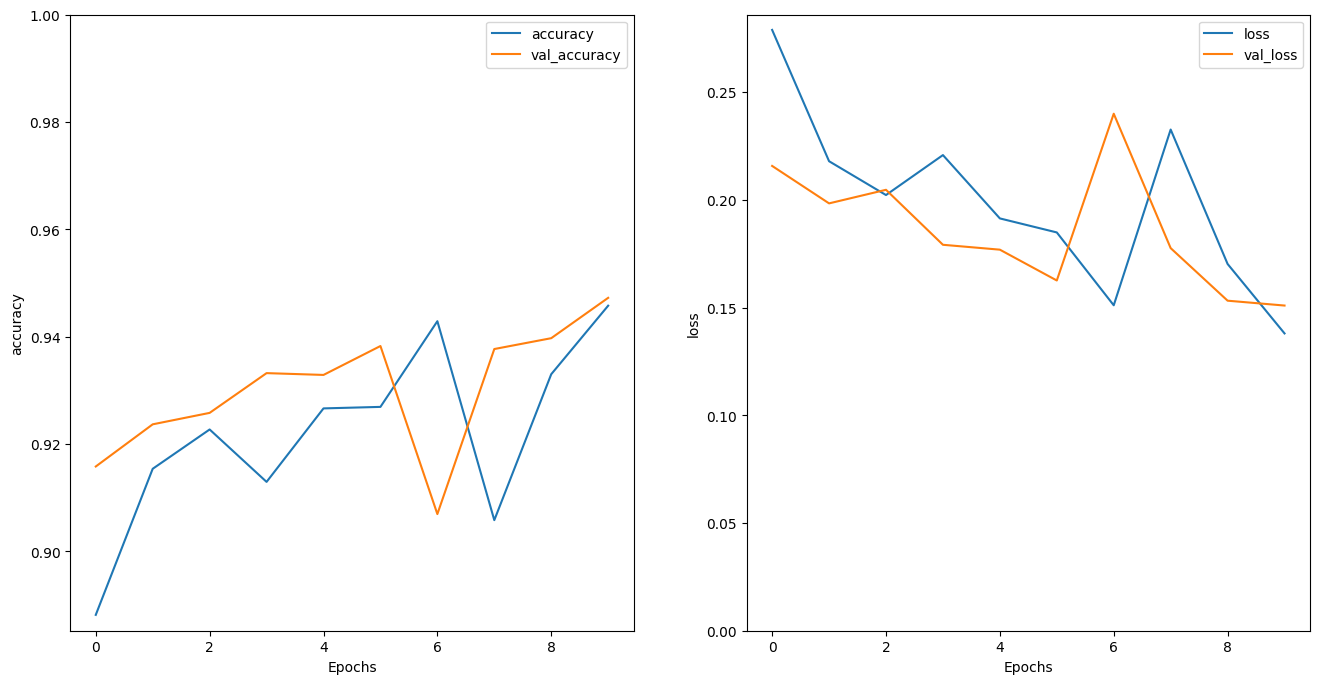

In [38]:
# plot the train/validation loss and accuracy
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])


plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

-Model Evaluation on Test Set

In [39]:
test_loss, test_acc = model.evaluate(X_test_seq, y_test)
y_hat = model.predict(X_test_seq)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

597/597 [==============================] - 73s 122ms/step
Test Loss: 0.1584242284297943
Test Accuracy: 0.9426461458206177


In [45]:
y_test_arg=np.argmax(y_test)
y_hat = np.argmax(model.predict(X_test_seq),axis=1)

597/597 [==============================] - 74s 123ms/step


In [58]:
y_test_CF = y_test.drop([0], axis=1)

In [59]:
#Convert to array 
y_test_CFA = y_test_CF.to_numpy()

In [62]:
# print classification report
print(classification_report(y_test_CFA, y_hat))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95     10473
           1       0.91      0.97      0.94      8619

    accuracy                           0.94     19092
   macro avg       0.94      0.94      0.94     19092
weighted avg       0.94      0.94      0.94     19092



<Axes: >

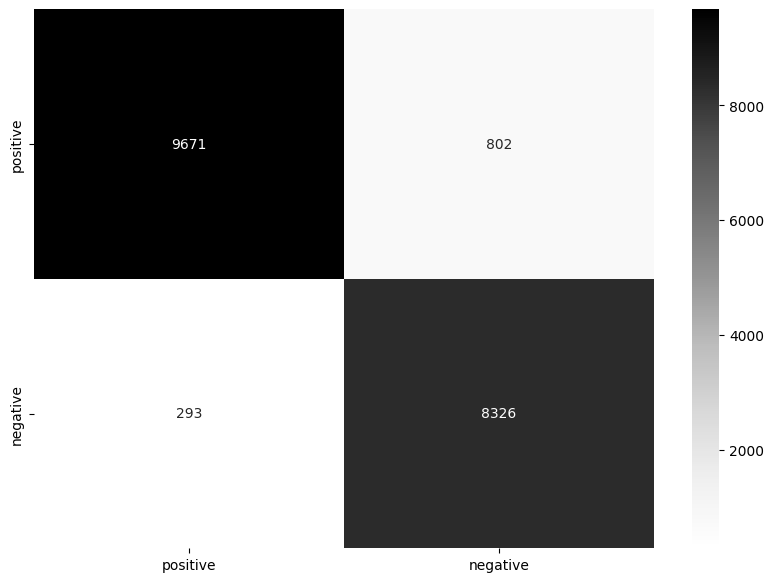

In [66]:
conf_mat = confusion_matrix(y_test_CFA,y_hat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['positive', 'negative']],
                  columns = [i for i in ['positive', 'negative']])
plt.figure(figsize = (10,7))
plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')
sns.heatmap(df_cm, annot=True, fmt='g', cmap='Greys')

The first thing to note is that sequential models such as the LSTM we performed take a lot of computation time due to its architecture. However, it worked in the overall very well, it gave us an accuracy of ~94 in the Training set and in the Test set. 

We only ran the model for 10 epochs, which as the plots of accuracy show,have some peaks and variations, these could be smoothed perhaps as the epochs increase, but that would increase significantly the amount of time for computation. A tradeoff that is not very practical for this notebook purpose.

From the exercise above we can conclude that LSTM we did is acceptable in terms of predictability due to the improvements it can do regarding contextual memory. The algorithm we built can detect a fake news with a certainty of almost 95%.
